#⚠️ Change runtime type to GPU before you continue

In [8]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


An attempt to implement Semantic Segmentation from the MICCAI2021 model

https://github.com/RViMLab/MICCAI2021_Cataract_semantic_segmentation/blob/main/environment.yml

# Environment set-up

Unfortunately, the model uses conda. Here is the models `environment.yml` file.

```
name: SemSegCat
channels:
  - pytorch
  - defaults
dependencies:
  - python=3.7.7      #*Colab version 3.7.13
  - pytorch           #*Not Installed
  - cudatoolkit=10.1  #*Not Installed
  - tensorboard
  - torchvision
  - h5py
  - matplotlib
  - numpy
  - scipy
  - opencv
  - pandas
  - pillow
  - pip
  - future
  - pip:
    - ttach
    - tqdm
```

In [9]:
!python --version


Python 3.7.13


In [10]:
# Install Dependencies and import libaries
# Pytorch
#!pip install torch torchvision torchaudio
import torch

#cudatoolkit is not needed

#tensorboard
import tensorboard

#h5py
import h5py

#matplotlib
import matplotlib

#numpy
import numpy as np

#scipy
import scipy

#opencv
import cv2

#pandas
import pandas

#pillow
import PIL

# future
import future

#ttach
!pip install ttach
import ttach

#tqdm
import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
%cd /content/drive/MyDrive/Stanford/Spring2022/RhexisProject/Rhexis/GitHub_rep_CoLab_Integration_Area/rhexis-trajectory/Semantic_Segmentation/MICCAI2021_Cataract_semantic_segmentation-main

/content/drive/.shortcut-targets-by-id/1IDKTg1NhIG_cRd73y7l18_QstadOerzT/Rhexis/GitHub_rep_CoLab_Integration_Area/rhexis-trajectory/Semantic_Segmentation/MICCAI2021_Cataract_semantic_segmentation-main


In [12]:
#Original: !python main.py -c configs/OCRNet_pretrained_t3.json -d 0 --data_path "path_to_data/segmentation"
datapath = "/content/drive/MyDrive/Rhexis/datasets/Segmentation_Tests/images"
logpath = "/content/drive/MyDrive/Stanford/Spring2022/RhexisProject/Rhexis/GitHub_rep_CoLab_Integration_Area/rhexis-trajectory/Semantic_Segmentation/MICCAI2021_Cataract_semantic_segmentation-main/logs"
!ls $datapath

# This line fails when attempting to read in img/labels because it is expecting
# the test set images and labels
#!python main.py -c configs/OCRNet_pretrained_t3.json -d 0 --data_path $datapath



AC1_rhexis_1264.jpg	KY9_rhexis_1059.jpg
AC1_rhexis_1351.jpg	KY9_rhexis_1116.jpg
AC1_rhexis_1373.jpg	KY9_rhexis_145.jpg
AC1_rhexis_1604.jpg	KY9_rhexis_168.jpg
AC1_rhexis_1691.jpg	KY9_rhexis_189.jpg
AC1_rhexis_1694.jpg	KY9_rhexis_214.jpg
AC1_rhexis_1813.jpg	KY9_rhexis_222.jpg
AC1_rhexis_183.jpg	KY9_rhexis_229.jpg
AC1_rhexis_1981.jpg	KY9_rhexis_259.jpg
AC1_rhexis_2078.jpg	KY9_rhexis_380.jpg
AC1_rhexis_2120.jpg	KY9_rhexis_38.jpg
AC1_rhexis_2186.jpg	KY9_rhexis_48.jpg
AC1_rhexis_2287.jpg	KY9_rhexis_500.jpg
AC1_rhexis_2320.jpg	KY9_rhexis_59.jpg
AC1_rhexis_2531.jpg	KY9_rhexis_632.jpg
AC1_rhexis_2560.jpg	KY9_rhexis_717.jpg
AC1_rhexis_298.jpg	KY9_rhexis_741.jpg
AC1_rhexis_428.jpg	KY9_rhexis_788.jpg
AC1_rhexis_833.jpg	KY9_rhexis_833.jpg
AC1_rhexis_983.jpg	KY9_rhexis_997.jpg
AC2_rhexis_13.jpg	Medi_08.18.20_2_rhexis_1013.jpg
AC2_rhexis_329.jpg	Medi_08.18.20_2_rhexis_143.jpg
AC2_rhexis_367.jpg	Medi_08.18.20_2_rhexis_1557.jpg
AC2_rhexis_382.jpg	Medi_08.18.20_2_rhexis_1585.jpg
AC2_rhexis_397.jpg	Medi_

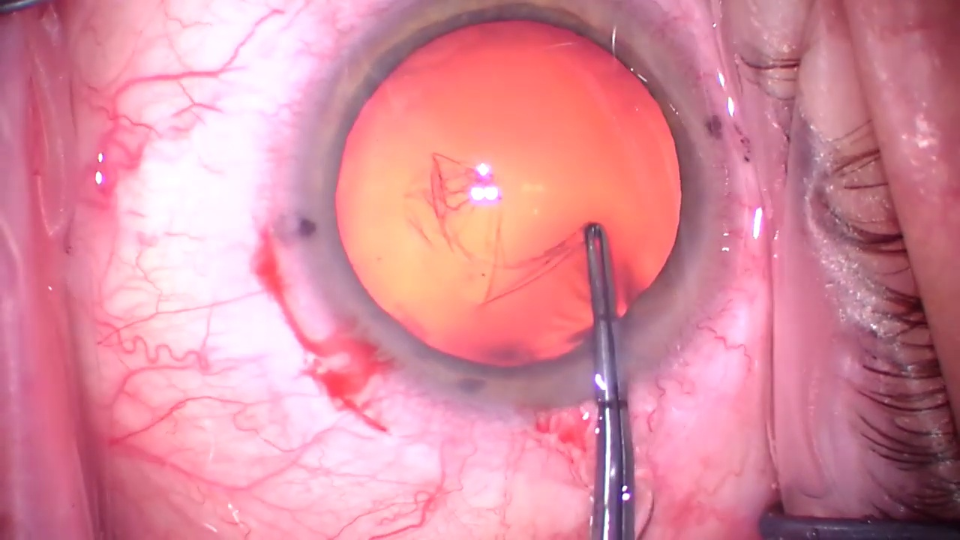

In [15]:
# Set up model config
from utils import parse_config
config_location = "configs/OCRNet_pretrained_t3.json"

config = parse_config("configs/OCRNet_pretrained_t3.json","",0)



# Load in model
from models import OCRNet
model_class = globals()[config['graph']['model']]

# Set up model object
model = model_class(config=config['graph'], experiment=3)

# Turn off intermediate output
model.get_intermediate = False

# Load in model checkpoint
checkpoint = torch.load(logpath +"/20210628_184832_e3__OCRNet_camera_ready"+"/chkpts"+"/chkpt_best.pt", 'cuda:{}'.format(config['gpu_device']))

# Set model to checkpoint
model.load_state_dict(checkpoint['model_state_dict'], strict=False)

# Read in image
img = cv2.imread(datapath + "/" "CataractCoach1_53.jpg")
from google.colab.patches import cv2_imshow

#cv2_imshow(img)


# David's images are 1920 x 1080
# we need images to be 960 x 540
img = cv2.resize(img, (960, 540)) 
cv2_imshow(img)


# Rearrange the channel dimension
img = np.swapaxes(img, 0,2)
img = np.swapaxes(img, 1,2)

# Add 4th dim for batch size
img = img[np.newaxis,:,:,:]

#print(img.shape)
#print(img.dtype)
# Forward pass model on image
up_logits = model.forward(torch.tensor(img).float())


In [2]:
print(up_logits.shape)

from torch import nn

label_predictions = torch.argmax(nn.Softmax2d()(up_logits), dim=1)

print(label_predictions.shape)

labels = label_predictions.numpy()

labels = labels[0,:,:]


cv2_imshow(10*labels)


NameError: ignored

In [3]:
from utils import get_matrix_fig

fig = get_matrix_fig(up_logits, 3)

ModuleNotFoundError: ignored